In [ ]:
%matplotlib inline


***********
Usage Guide
***********

This tutorial covers some basic usage patterns and best-practices to
help you get started with Matplotlib.


General Concepts
================

`matplotlib` has an extensive codebase that can be daunting to many
new users. However, most of matplotlib can be understood with a fairly
simple conceptual framework and knowledge of a few important points.

Plotting requires action on a range of levels, from the most general
(e.g., 'contour this 2-D array') to the most specific (e.g., 'color
this screen pixel red'). The purpose of a plotting package is to assist
you in visualizing your data as easily as possible, with all the necessary
control -- that is, by using relatively high-level commands most of
the time, and still have the ability to use the low-level commands when
needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top
of the hierarchy is the matplotlib "state-machine environment" which is
provided by the :mod:`matplotlib.pyplot` module. At this level, simple
functions are used to add plot elements (lines, images, text, etc.) to
the current axes in the current figure.


The next level down in the hierarchy is the first level of the object-oriented
interface, in which pyplot is used only for a few functions such as figure
creation, and the user explicitly creates and keeps track of the figure
and axes objects. At this level, the user uses pyplot to create figures,
and through those figures, one or more axes objects can be created. These
axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding
matplotlib plots in GUI applications -- the pyplot level may be dropped
completely, leaving a purely object-oriented approach.

<img src="https://matplotlib.org/3.1.1/_images/anatomy.png" />

In [2]:
import matplotlib.pyplot as plt
import numpy as np


Parts of a Figure
=================

![](../../_static/anatomy.png)



The `Figure`
----------------------------------

The **whole** figure.  The figure keeps
track of all the child :class:`~matplotlib.axes.Axes`, a smattering of
'special' artists (titles, figure legends, etc), and the **canvas**.
(Don't worry too much about the canvas, it is crucial as it is the
object that actually does the drawing to get you your plot, but as the
user it is more-or-less invisible to you).  A figure can have any
number of :class:`~matplotlib.axes.Axes`, but to be useful should have
at least one.

The easiest way to create a new figure is with pyplot:



<Figure size 432x288 with 0 Axes>

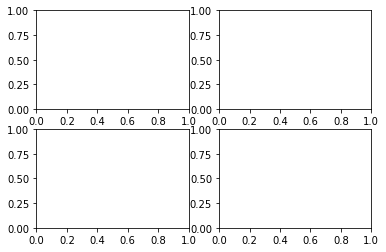

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

:class:`Axes`
------------------------------

This is what you think of as 'a plot', it is the region of the image
with the data space. A given figure
can contain many Axes, but a given :class:`~matplotlib.axes.Axes`
object can only be in one :class:`~matplotlib.figure.Figure`.  The
Axes contains two (or three in the case of 3D)
:class:`~matplotlib.axis.Axis` objects (be aware of the difference
between **Axes** and **Axis**) which take care of the data limits (the
data limits can also be controlled via set via the
:meth:`~matplotlib.axes.Axes.set_xlim` and
:meth:`~matplotlib.axes.Axes.set_ylim` :class:`Axes` methods).  Each
:class:`Axes` has a title (set via
:meth:`~matplotlib.axes.Axes.set_title`), an x-label (set via
:meth:`~matplotlib.axes.Axes.set_xlabel`), and a y-label set via
:meth:`~matplotlib.axes.Axes.set_ylabel`).

The :class:`Axes` class and its member functions are the primary entry
point to working with the OO interface.

:class:`Axis`
------------------------------

These are the number-line-like objects. They take
care of setting the graph limits and generating the ticks (the marks
on the axis) and ticklabels (strings labeling the ticks).  The
location of the ticks is determined by a
:class:`~matplotlib.ticker.Locator` object and the ticklabel strings
are formatted by a :class:`~matplotlib.ticker.Formatter`.  The
combination of the correct :class:`Locator` and :class:`Formatter` gives
very fine control over the tick locations and labels.

:class:`~matplotlib.artistArtist`
----------------------------------

Basically everything you can see on the figure is an artist (even the
:class:`Figure`, :class:`Axes`, and :class:`Axis` objects).  This
includes :class:`Text` objects, :class:`Line2D` objects,
:class:`collection` objects, :class:`Patch` objects ... (you get the
idea).  When the figure is rendered, all of the artists are drawn to
the **canvas**.  Most Artists are tied to an Axes; such an Artist
cannot be shared by multiple Axes, or moved from one to another.


Types of inputs to plotting functions
=====================================

All of plotting functions expect `np.array` or `np.ma.masked_array` as
input.  Classes that are 'array-like' such as `pandas` data objects
and `np.matrix` may or may not work as intended.  It is best to
convert these to `np.array` objects prior to plotting.

For example, to convert a `pandas.DataFrame` ::

  a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
  a_asarray = a.values

and to convert a `np.matrix` ::

  b = np.matrix([[1,2],[3,4]])
  b_asarray = np.asarray(b)


Matplotlib, pyplot and pylab: how are they related?
====================================================

Matplotlib is the whole package and :mod:`matplotlib.pyplot` is a module in
Matplotlib.

For functions in the pyplot module, there is always a "current" figure and
axes (which is created automatically on request).  For example, in the
following example, the first call to ``plt.plot`` creates the axes, then
subsequent calls to ``plt.plot`` add additional lines on the same axes, and
``plt.xlabel``, ``plt.ylabel``, ``plt.title`` and ``plt.legend`` set the
axes labels and title and add a legend.



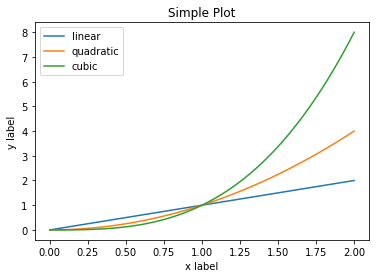

In [4]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

:mod:`pylab` is a convenience module that bulk imports
:mod:`matplotlib.pyplot` (for plotting) and :mod:`numpy`
(for mathematics and working with arrays) in a single namespace.
pylab is deprecated and its use is strongly discouraged because
of namespace pollution. Use pyplot instead.

For non-interactive plotting it is suggested
to use pyplot to create the figures and then the OO interface for
plotting.


Coding Styles
==================

When viewing this documentation and examples, you will find different
coding styles and usage patterns. These styles are perfectly valid
and have their pros and cons. Just about all of the examples can be
converted into another style and achieve the same results.
The only caveat is to avoid mixing the coding styles for your own code.

<div class="alert alert-info"><h4>Note</h4><p>Developers for matplotlib have to follow a specific style and guidelines.
   See `developers-guide-index`.</p></div>

Of the different styles, there are two that are officially supported.
Therefore, these are the preferred ways to use matplotlib.

For the pyplot style, the imports at the top of your
scripts will typically be::

    import matplotlib.pyplot as plt
    import numpy as np

Then one calls, for example, np.arange, np.zeros, np.pi, plt.figure,
plt.plot, plt.show, etc.  Use the pyplot interface
for creating figures, and then use the object methods for the rest:



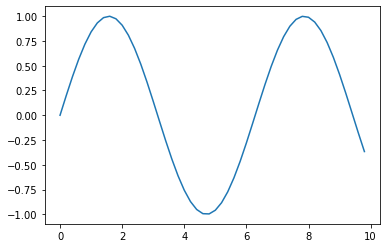

In [5]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

So, why all the extra typing instead of the MATLAB-style (which relies
on global state and a flat namespace)?  For very simple things like
this example, the only advantage is academic: the wordier styles are
more explicit, more clear as to where things come from and what is
going on.  For more complicated applications, this explicitness and
clarity becomes increasingly valuable, and the richer and more
complete object-oriented interface will likely make the program easier
to write and maintain.


Typically one finds oneself making the same plots over and over
again, but with different data sets, which leads to needing to write
specialized functions to do the plotting.  The recommended function
signature is something like:



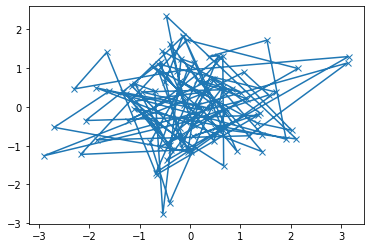

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

or if you wanted to have 2 sub-plots:



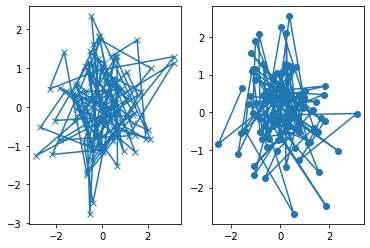

In [9]:
import matplotlib.style as mplstyle 
mplstyle.use('fast')
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})